In [1]:
options(repr.plot.width=10, repr.plot.height=6)

In [2]:
library(dplyr)
library(forecast)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
earnings <- read.csv("C:\\Users\\rhohe\\Documents\\JupyterScratch\\stocks_latest\\earnings_latest.csv")
earnings$eps <- as.numeric(earnings$eps)
earnings$date <- as.Date(earnings$date)
aapl <- earnings %>% filter(symbol=='AAPL', eps!='NULL', date>'2012-1-1')

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


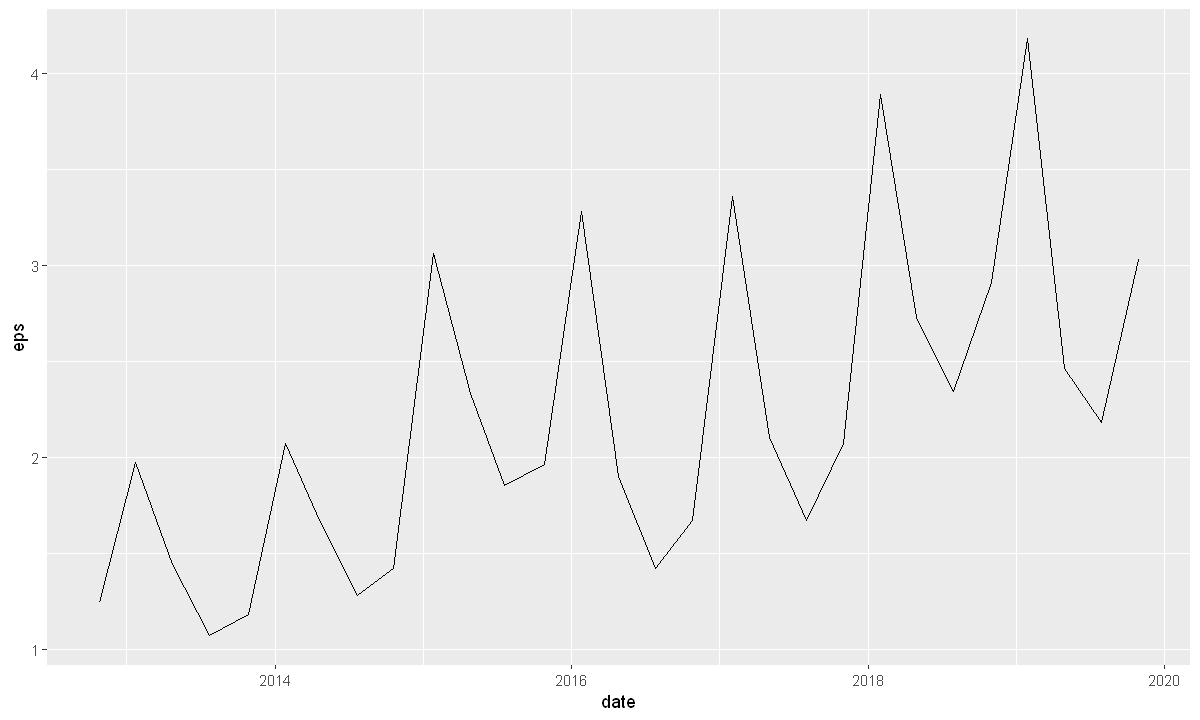

In [4]:
ggplot(aapl, aes(x=date, y=eps)) + geom_line()

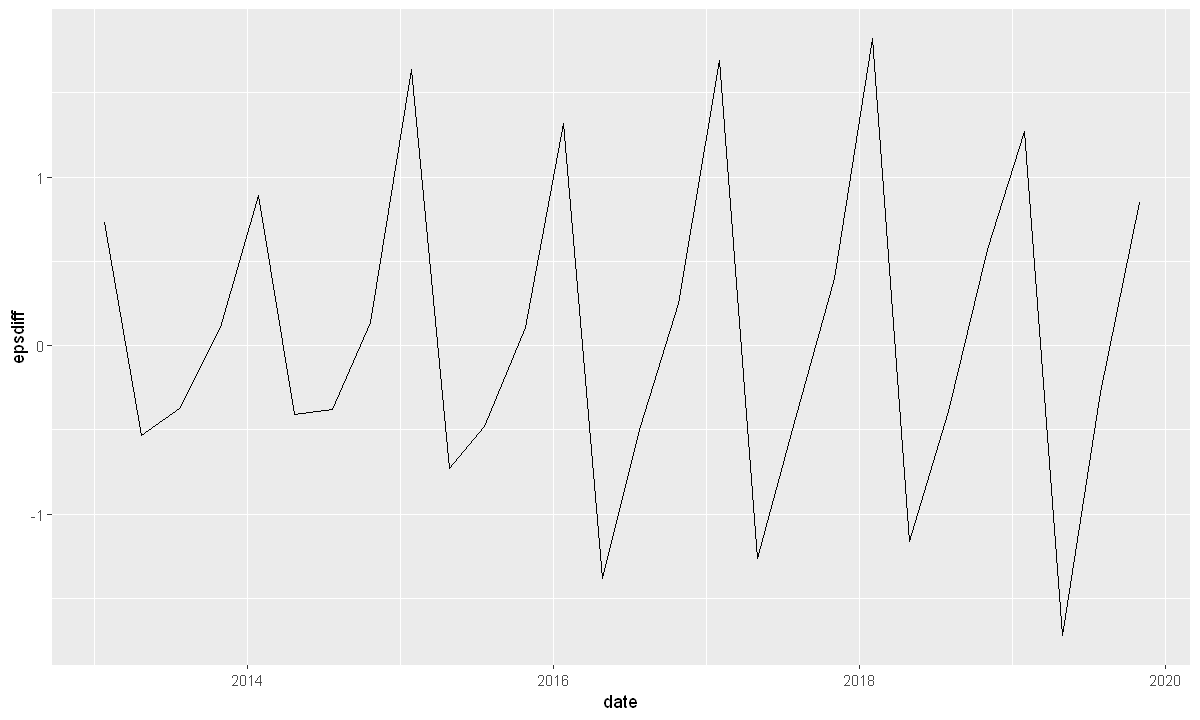

In [5]:
epsdiff <- diff(aapl$eps)
aapl <- aapl[c(2:nrow(aapl)), c(0:ncol(aapl))]
aapl$epsdiff <- epsdiff
ggplot(aapl, aes(x=date, y=epsdiff)) + geom_line()

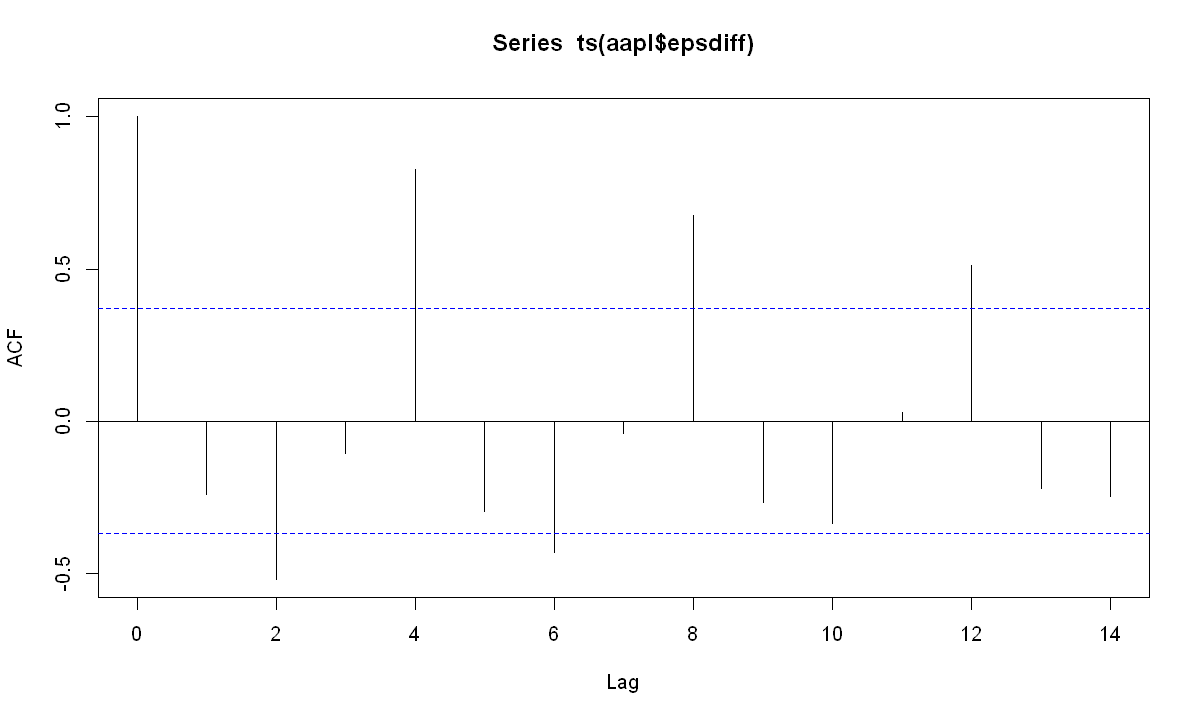

In [6]:
acf(ts(aapl$epsdiff))

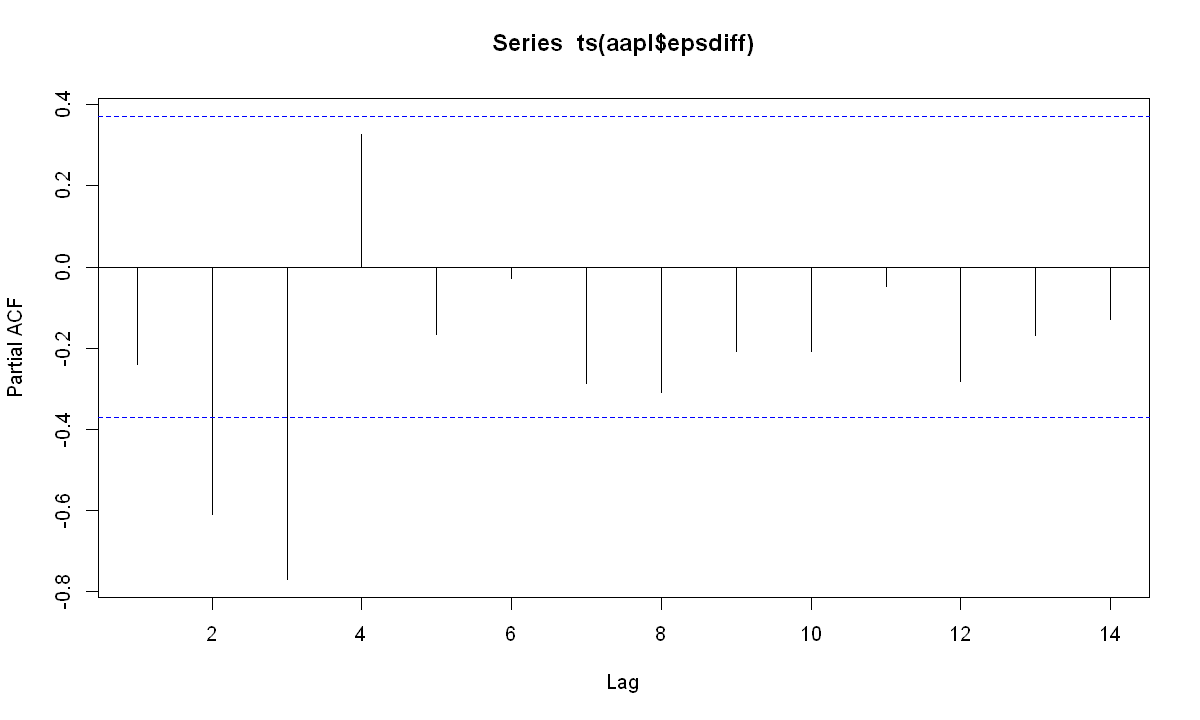

In [7]:
pacf(ts(aapl$epsdiff))

In [8]:
f <- Arima(y=ts(aapl$eps), order=c(0,1,0),  seasonal=list(order=c(0, 1, 0), period=4))
f

Series: ts(aapl$eps) 
ARIMA(0,1,0)(0,1,0)[4] 

sigma^2 estimated as 0.09461:  log likelihood=-5.52
AIC=13.04   AICc=13.23   BIC=14.17

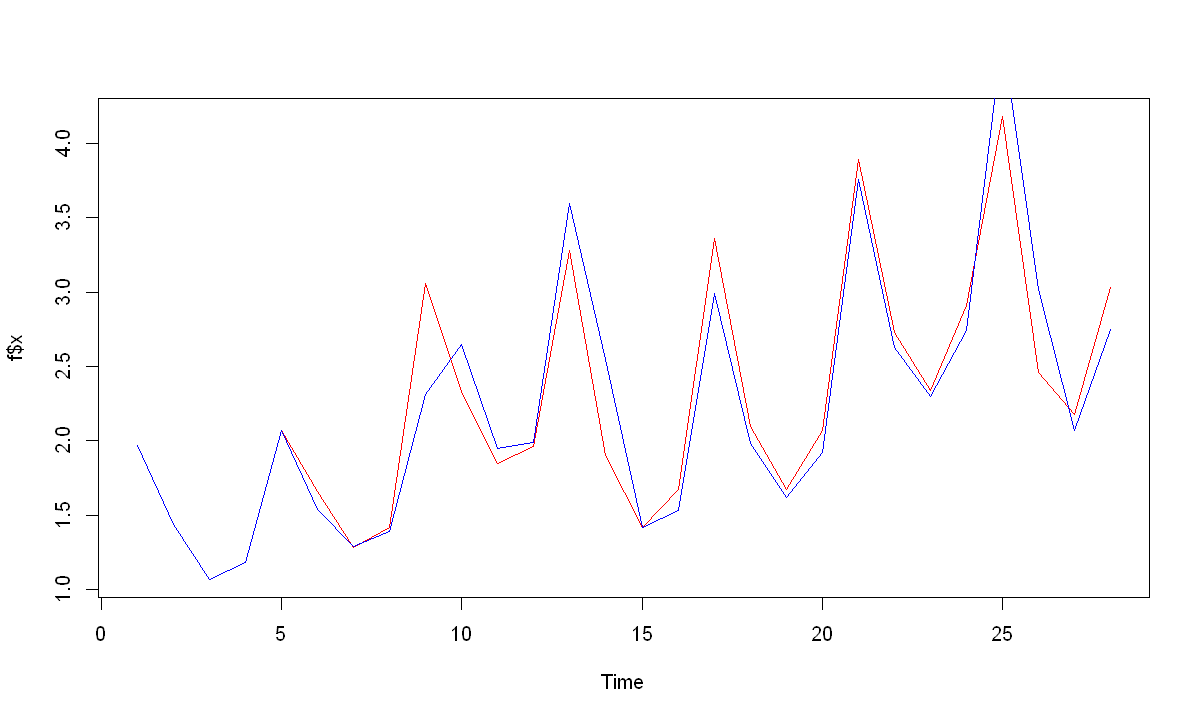

In [9]:
# plot actual in red, predicted in blue
# plot()
plot(f$x, col='red')
lines(fitted(f),col="blue")

In [10]:
# recreate predicted from scratch to make sure I understand what the model is doing
aapl <- mutate(aapl, lag1=lag(eps), lag4=lag(eps, 4), lag5=lag(eps, 5))
aapl$pred_scratch <- aapl$lag1-aapl$lag5+aapl$lag4
aapl$pred <- fitted(f)
aapl

symbol,date,qtr,eps_est,eps,release_time,epsdiff,lag1,lag4,lag5,pred_scratch,pred
<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ts>
AAPL,2013-01-23,12/2012,1.9200,1.97,post,0.73,NA,NA,NA,NA,1.968863
AAPL,2013-04-23,03/2013,1.4500,1.44,post,-0.53,1.97,NA,NA,NA,1.439902
AAPL,2013-07-23,06/2013,1.0400,1.07,post,-0.37,1.44,NA,NA,NA,1.070248
AAPL,2013-10-28,09/2013,1.1300,1.18,post,0.11,1.07,NA,NA,NA,1.180692
AAPL,2014-01-27,12/2013,2.0100,2.07,post,0.89,1.18,1.97,NA,NA,2.072553
AAPL,2014-04-23,03/2014,1.4600,1.66,post,-0.41,2.07,1.44,1.97,1.54,1.540000
AAPL,2014-07-22,06/2014,1.2200,1.28,post,-0.38,1.66,1.07,1.44,1.29,1.290000
AAPL,2014-10-20,09/2014,1.3000,1.42,post,0.14,1.28,1.18,1.07,1.39,1.390000
AAPL,2015-01-27,12/2014,2.6000,3.06,post,1.64,1.42,2.07,1.18,2.31,2.310000
